# Playstore Apps Analysis and Prediction Project

In [1]:
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

## Step 1: Problem Statement:
The requirment of the project is to create a web service in which you could add the details of your application and it would predict the number of installs that your application could gain. another page would be created to direct you to the optimum application properties through which you could be able to improve the success of your application.

## Step 2: Data Collection:
 the data collection process was performed in the jupyter file of title "scrapping.ipynb"

In [2]:
df = pd.read_csv('overall_data.csv')
df.head()

,app_name,app_company,app_rating,underTitle,app_price,gener,noOfComments,page_index,latest_Update,size,Installs,android_Version_Supported,InterActive_Elem,content_Rating,Report,In-app_Purchases
0,YouTube,Google LLC,4.3,Recommended for you,0,Video Players & Editors,121306065,1,26-Aug-21,Varies with device,"10,000,000,000+",Varies with device,"Users Interact, Digital Purchases",TeenLearn more,Flag as inappropriate,NaN
1,Subway Surfers,SYBO Games,4.4,Recommended for you,0,Arcade,36209360,1,12-Aug-21,174M,"1,000,000,000+",4.4 and up,In-Game Purchases,Everyone 10+Fantasy ViolenceLearn more,Flag as inappropriate,$0.99 - $99.99 per item
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,0,Entertainment,11979087,1,26-Aug-21,Varies with device,"1,000,000,000+",Varies with device,NaN,TeenLearn more,Flag as inappropriate,$7.99 - $13.99 per item
3,Instagram,Instagram,3.8,Recommended for you,0,Social,123499183,1,23-Aug-21,Varies with device,"1,000,000,000+",Varies with device,"Users Interact, Shares Info, Shares Location",TeenLearn more,Flag as inappropriate,$0.99 - $4.99 per item
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,0,Casual,3859794,1,18-Aug-21,126M,"100,000,000+",5.0 and up,Digital Purchases,EveryoneComic MischiefLearn more,Flag as inappropriate,$0.99 - $99.99 per item


## Step 3: Understanding the Domain and Specify Project Requirements:

- collection of applications data from playstore
- data cleaning through piplines
- analysing apps data and create insights for:
    
    *all these analysis is for specifying the perfect combination to have an application with high number of installs*
    - from the company column:
        - relationship between company and number of installs 
        - relationship between company and number of comments on the application
        - relationship between company and app rating
        - relationship between company and number of reports/ reports type    
    - from the underTitle column:
        - relationship between the title of app recommendation and the number of installs 
        - if there is a reltionship between the repetitive app appearance under multiple titles and the number of installs
    - from the gener column:
        - relationship between gener and number of installs
        - relationship between gener and number of comments
        - relationship between gener and updateing date (is a specific gener less updated than others)
        - relationship between gener and size of application
        - relationship between gener and android version
        - relationship between gener and type and number of interactive elements needed for the application development
        - relationship between gener and number of reports
        - relationship between gener and price of app_purchases
    - from the number of comments column:
        - relationship between number of comments and number of installs
        - relationship between number of comments and the existance of interactive elements
        - relationship between number of comments and the app reporting
        - relationship between number of comments and the price of in_app_purchases
    - from the size column:
        - relationship between size of app and the android version supported
        - relationship between size of app and the interactive elements in app
        - relationship between size of app and the number of comments
        - relationship between size of app and the number of installs


- create a ML predictive model for:
    - predicting the number of installs for a given unknown application
    - clustering applications according to number of installs 
    - perform dimentionality reduction to reduce number of features
    - anomaly detection to find hidden patterns between data

## a) understand better the data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   app_name                   807 non-null    object 
 1   app_company                807 non-null    object 
 2   app_rating                 807 non-null    float64
 3   underTitle                 807 non-null    object 
 4   app_price                  807 non-null    object 
 5   gener                      803 non-null    object 
 6   noOfComments               803 non-null    object 
 7   page_index                 807 non-null    int64  
 8   latest_Update              807 non-null    object 
 9   size                       807 non-null    object 
 10  Installs                   807 non-null    object 
 11  android_Version_Supported  807 non-null    object 
 12  InterActive_Elem           574 non-null    object 
 13  content_Rating             807 non-null    object 

- interactive elements contain 574 non null elements = 233 Nones - no interactive elements used in the app
- in-app_purchases contain 440 non null elemenets = 367 Nones - contains no in-app purchases
- genre and noOfComments are missing 4 rows - guess i'll have to drop them

**this may be due tothe existance of apps containing no interactive elements or in-app purchases**

- some object columns are supposed to be numeric pre any processing as: app_price, noOfComments, size, Installs, android_Version_Supported, content_Rating

In [4]:
 df.describe()

,app_rating,page_index
count,807.000000,807.000000
mean,4.306568,1.929368
std,0.403206,0.256368
min,1.600000,1.000000
25%,4.200000,2.000000
50%,4.400000,2.000000
75%,4.600000,2.000000
max,4.900000,2.000000


### some visualizations to understand the data

D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\envs\MLenv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


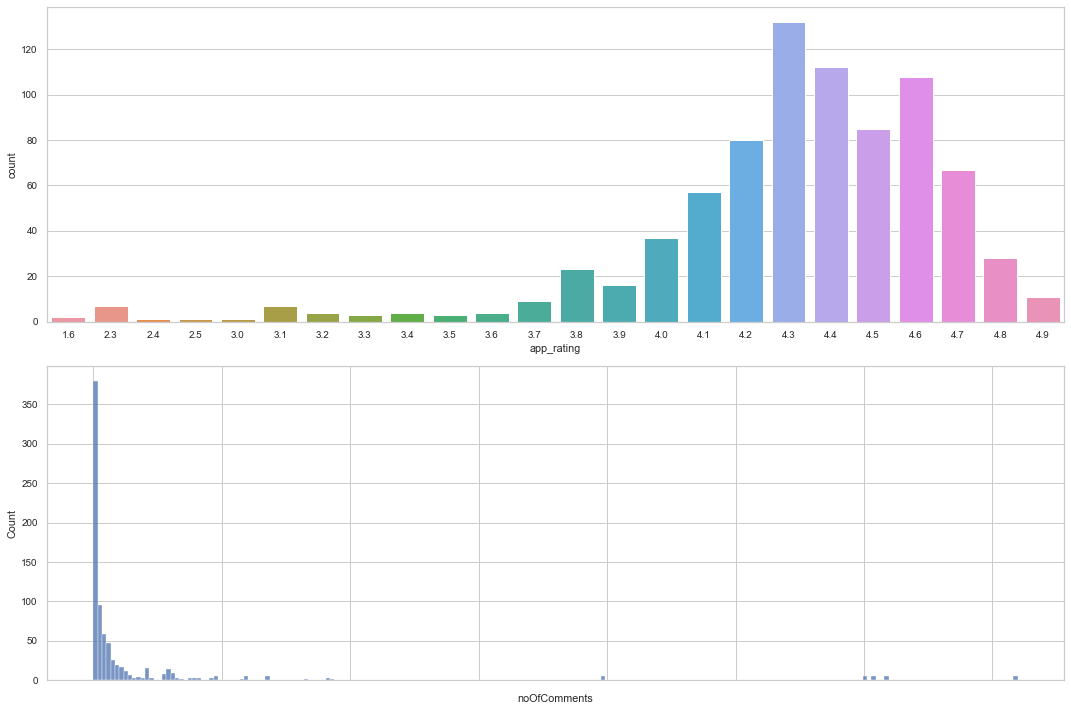

In [46]:
sns.set(rc={'figure.figsize': [15,10]}, font_scale=0.9, style='whitegrid')
plt.subplot(2,1,1)
sns.countplot(df['app_rating'])
plt.subplot(2,1,2)
ax = sns.histplot(df['noOfComments'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

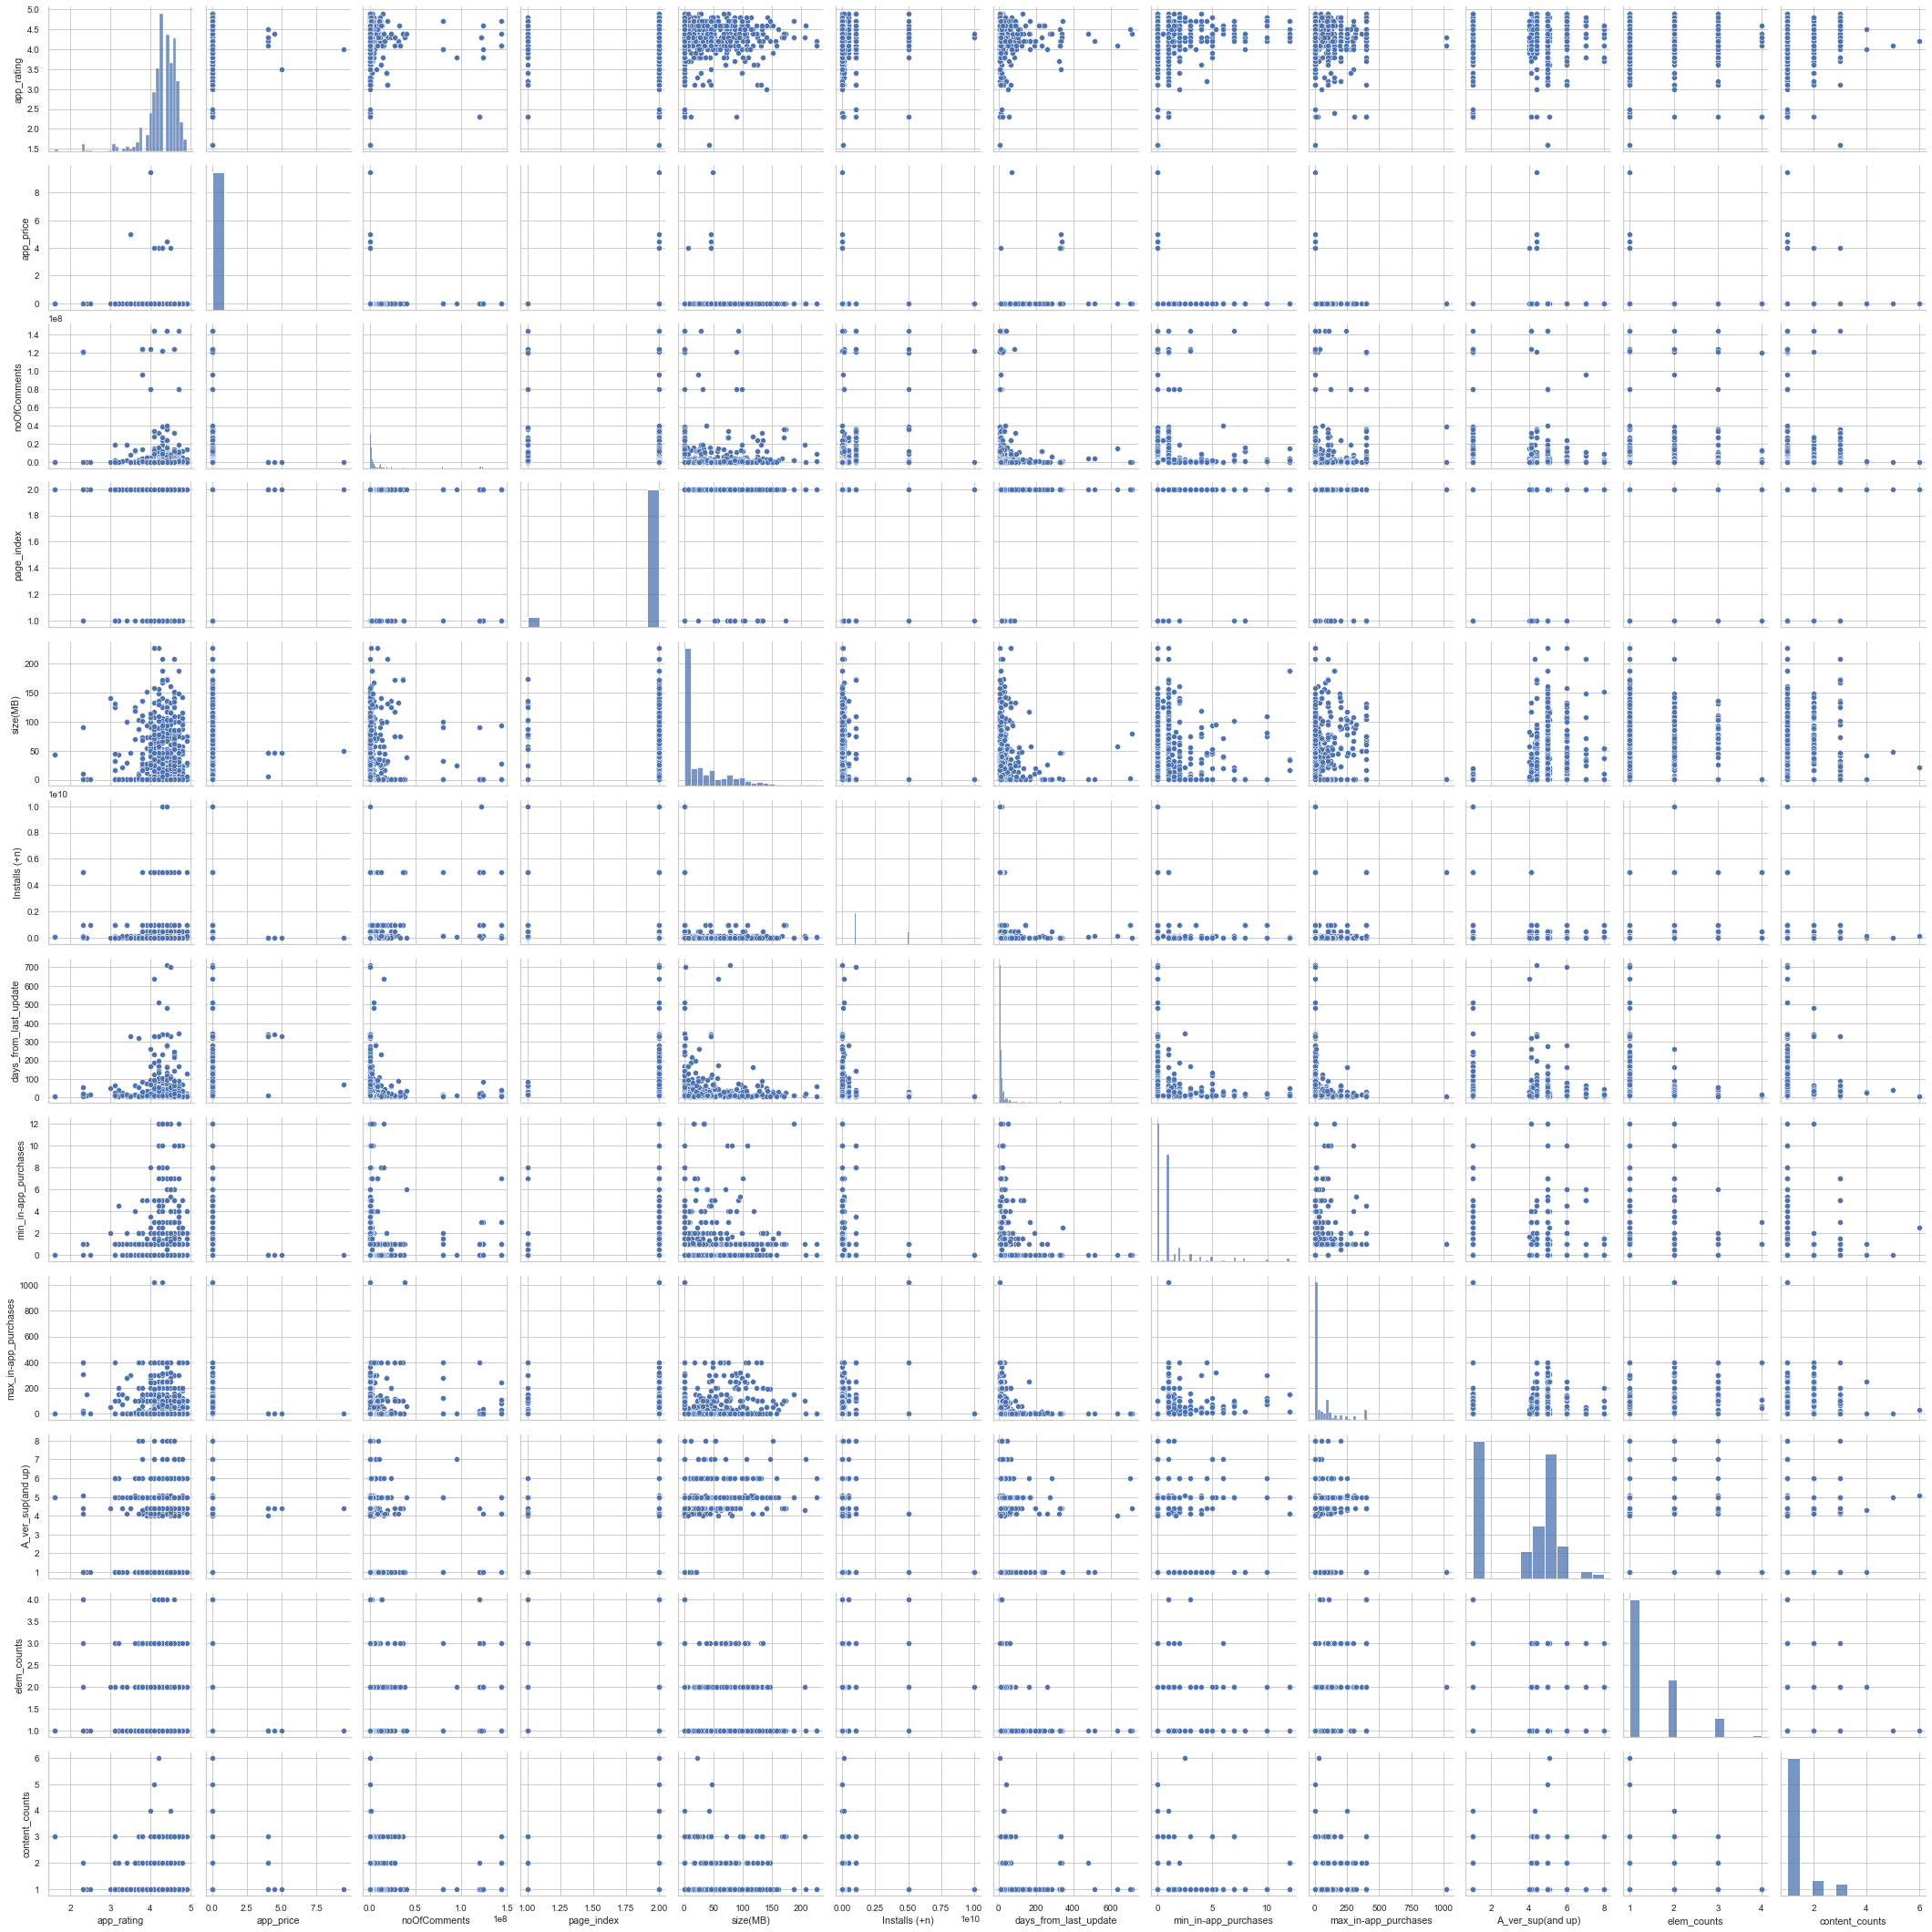

In [43]:
sns.pairplot(df)

<AxesSubplot:>

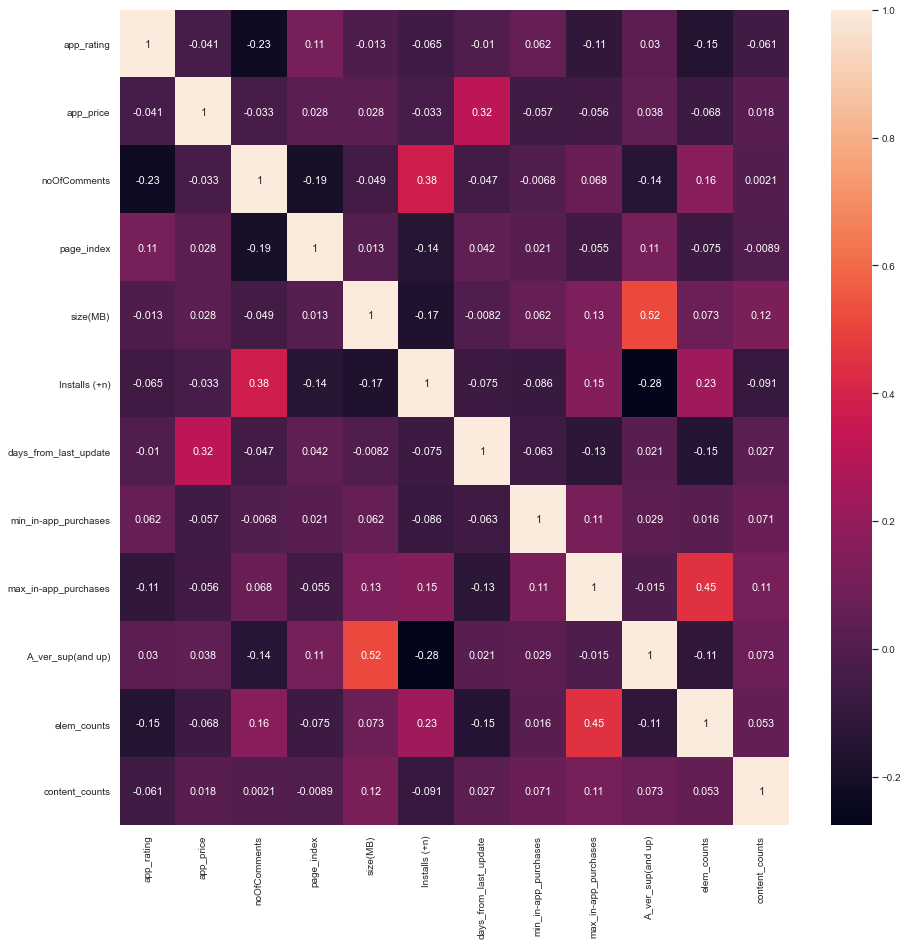

In [43]:
sns.set(rc={'figure.figsize': [15,15]}, font_scale=0.9, style='whitegrid')
sns.heatmap(df.corr(), cbar=True,  annot=True)

# Step 3: Data Preprocessing and Feature Engineering:

## 1 -  Removing Nans:

In [5]:
df[df.columns[df.isna().any()].tolist()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gener             803 non-null    object
 1   noOfComments      803 non-null    object
 2   InterActive_Elem  574 non-null    object
 3   In-app_Purchases  440 non-null    object
dtypes: object(4)
memory usage: 25.3+ KB


In [6]:
df['InterActive_Elem'] = df['InterActive_Elem'].fillna('No Element')

In [7]:
df['In-app_Purchases'] = df['In-app_Purchases'].fillna('0 - 0')

In [8]:
df[df['noOfComments'].isna()] # nans of gener and noOfComments are the same

,app_name,app_company,app_rating,underTitle,app_price,gener,noOfComments,page_index,latest_Update,size,Installs,android_Version_Supported,InterActive_Elem,content_Rating,Report,In-app_Purchases
627,Transit: Bus & Subway Times,"Transit, Inc.",4.2,Low on space?,0,NaN,NaN,2,31-Aug-21,30M,"5,000,000+",5.0 and up,Shares Info,EveryoneLearn more,Flag as inappropriate,0 - 0
631,Job Search by ZipRecruiter,"ZipRecruiter, Inc.",4.8,Low on space?,0,NaN,NaN,2,19-Aug-21,101M,"10,000,000+",6.0 and up,No Element,EveryoneLearn more,Flag as inappropriate,$0.99 per item
688,Jamboard,Google LLC,3.5,Tools & utilities,0,NaN,NaN,2,17-Jun-21,Varies with device,"100,000,000+",Varies with device,Users Interact,EveryoneLearn more,Flag as inappropriate,0 - 0
715,"AllTrails: Hiking, Running & Mountain Bike Trails","AllTrails, LLC",4.5,Maps & GPS,0,NaN,NaN,2,18-Aug-21,Varies with device,"10,000,000+",5.0 and up,Shares Info,EveryoneLearn more,Flag as inappropriate,0 - 0


In [9]:
df = df.dropna()

## 2 - converting object data types to correct int/ float datatype

In [10]:
df['app_price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$9.49 ', '$4.49 '], dtype=object)

In [11]:
res = []
for i in df['app_price']:
    res.append(float(i.strip('$').strip(' ')))
df['app_price'] = res
df['app_price'].unique()

array([0.  , 4.99, 3.99, 9.49, 4.49])

In [12]:
res = []
for i in df['noOfComments']:
    if ',' in i:
        res.append(int(''.join(i.split(','))))
    else:
        res.append(int(i))
df['noOfComments']=res

In [13]:
res = []
for i in df['size']:
    if i == 'Varies with device':
        res.append(1)
    else:
        res.append(float(i.strip('M')))
                   
df['size(MB)'] = res
df = df.drop(['size'], axis=1)

In [14]:
res = []
for i in df['Installs']:
    r = ''.join(i.strip('+').split(','))
    res.append(int(r))
df['Installs (+n)'] = res
df = df.drop('Installs', axis=1)

In [15]:
current_date = dt.datetime.now()
df['latest_Update'] = pd.to_datetime(df['latest_Update'])
df['days_from_last_update'] = current_date.date()- df['latest_Update'].dt.date
days = []
for t in df['days_from_last_update']:
    days.append(t.days)

df['days_from_last_update']=days
df = df.drop('latest_Update', axis=1)

In [16]:
Min = []
Max = []
for i in df['In-app_Purchases']:
    if ',' in i:
        i = ''.join(i.split(','))
    Min.append(float(i.split(' ')[0].strip('$')))
    try:
        Max.append(float(i.split(' ')[2].strip('$')))
    except Exception:
        Max.append(float(i.split(' ')[0].strip('$')))

df['min_in-app_purchases'] = Min
df['max_in-app_purchases'] = Max
df = df.drop(['In-app_Purchases'], axis=1)

In [17]:
df = df.drop(df[df['android_Version_Supported']=='4.4 - 6.0'].index, axis=0)
df = df.reset_index(drop=True)

In [18]:
res = []
for i in df['android_Version_Supported']:
    if i == 'Varies with device':
        res.append(1.0)
    else:
        if i == '4.0.3 and up':
            i = '4.0 and up'
        res.append(float(i.strip(' and up')))
df['A_ver_sup(and up)'] = res
df = df.drop('android_Version_Supported', axis=1)

## 3 -  work with categorical data:

In [19]:
df.head()

,app_name,app_company,app_rating,underTitle,app_price,gener,noOfComments,page_index,InterActive_Elem,content_Rating,Report,size(MB),Installs (+n),days_from_last_update,min_in-app_purchases,max_in-app_purchases,A_ver_sup(and up)
0,YouTube,Google LLC,4.3,Recommended for you,0.0,Video Players & Editors,121306065,1,"Users Interact, Digital Purchases",TeenLearn more,Flag as inappropriate,1.0,10000000000,14,0.00,0.00,1.0
1,Subway Surfers,SYBO Games,4.4,Recommended for you,0.0,Arcade,36209360,1,In-Game Purchases,Everyone 10+Fantasy ViolenceLearn more,Flag as inappropriate,174.0,1000000000,28,0.99,99.99,4.4
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,0.0,Entertainment,11979087,1,No Element,TeenLearn more,Flag as inappropriate,1.0,1000000000,14,7.99,13.99,1.0
3,Instagram,Instagram,3.8,Recommended for you,0.0,Social,123499183,1,"Users Interact, Shares Info, Shares Location",TeenLearn more,Flag as inappropriate,1.0,1000000000,17,0.99,4.99,1.0
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,0.0,Casual,3859794,1,Digital Purchases,EveryoneComic MischiefLearn more,Flag as inappropriate,126.0,100000000,22,0.99,99.99,5.0


In [20]:
df['underTitle'].unique()

array(['Recommended for you', 'Share photos & videos',
       'Video editors & players', 'Entertainment', "Editors' Choice apps",
       'Social networking', 'Popular apps & games', 'Take better photos',
       'Watch TV & movies', 'Communication', 'Video chatting',
       'Music & audio', 'Productivity', 'Recently updated',
       'Low on space?', 'Tools & utilities', 'Maps & GPS', 'Go shopping',
       'Budgeting tools', 'Premium apps'], dtype=object)

In [21]:
df['gener'].unique()

array(['Video Players & Editors', 'Arcade', 'Entertainment', 'Social',
       'Casual', 'Photography', 'Music & Audio', 'Educational',
       'Lifestyle', 'Communication', 'Shopping', 'Books & Reference',
       'Productivity', 'Travel & Local', 'Adventure', 'Music', 'Action',
       'Education', 'Business', 'Tools', 'Strategy', 'Sports',
       'News & Magazines', 'Puzzle', 'Art & Design', 'Weather',
       'Health & Fitness', 'House & Home', 'Finance', 'Maps & Navigation',
       'Food & Drink', 'Personalization', 'Medical', 'Parenting',
       'Auto & Vehicles'], dtype=object)

In [22]:
df['InterActive_Elem'].unique()

array(['Users Interact, Digital Purchases', 'In-Game Purchases',
       'No Element', 'Users Interact, Shares Info, Shares Location',
       'Digital Purchases',
       'Users Interact, Shares Info, Shares Location, Digital Purchases',
       'Users Interact, Shares Info',
       'Users Interact, Shares Info, Digital Purchases', 'Users Interact',
       'Users Interact, Shares Location, In-App Purchases',
       'In-App Purchases', 'Shares Info, Digital Purchases',
       'Users Interact, Shares Location',
       'Users Interact, In-App Purchases',
       'Users Interact, In-Game Purchases', 'Shares Info',
       'Unrestricted Internet', 'Shares Location',
       'Digital Purchases, Unrestricted Internet',
       'Users Interact, Unrestricted Internet',
       'Users Interact, Shares Location, Digital Purchases',
       'Shares Location, Unrestricted Internet',
       'Shares Info, Shares Location',
       'Shares Location, In-App Purchases'], dtype=object)

In [23]:
pairs = []
for elem in df['InterActive_Elem']:
    if elem !=0:
        pair = elem.split(', ')
        pairs.append(pair)
    else:
        pairs.append([0])
df['InterActive_Elem'] = pairs

In [24]:
Dict = {}
for i,j in zip(range(0,len(df)), df['InterActive_Elem']):
    Dict[i]=j
s = pd.Series(Dict)
s = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)

In [25]:
df_final = pd.merge(df, s, right_index = True, left_index = True)
df_final = df_final.drop('InterActive_Elem', axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   app_name               802 non-null    object 
 1   app_company            802 non-null    object 
 2   app_rating             802 non-null    float64
 3   underTitle             802 non-null    object 
 4   app_price              802 non-null    float64
 5   gener                  802 non-null    object 
 6   noOfComments           802 non-null    int64  
 7   page_index             802 non-null    int64  
 8   content_Rating         802 non-null    object 
 9   Report                 802 non-null    object 
 10  size(MB)               802 non-null    float64
 11  Installs (+n)          802 non-null    int64  
 12  days_from_last_update  802 non-null    int64  
 13  min_in-app_purchases   802 non-null    float64
 14  max_in-app_purchases   802 non-null    float64
 15  A_ver_

In [26]:
elem1 = []
elem2 = []
elem3 = []
elem4 = []

for elem in df['InterActive_Elem']:
    if len(elem)==1:
        elem1.append(elem[0])
        elem2.append(0)
        elem3.append(0)
        elem4.append(0)
    elif len(elem)==2:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(0)
        elem4.append(0)
    elif len(elem)==3:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(elem[2])
        elem4.append(0)
    elif len(elem)==4:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(elem[2])
        elem4.append(elem[3])

df['Interactive_elem1']=elem1
df['Interactive_elem2']=elem2
df['Interactive_elem3']=elem3
df['Interactive_elem4']=elem4

elem_counts = []
for i in df['InterActive_Elem']:
    elem_counts.append(len(i))
df['elem_counts']=elem_counts
df.head()

,app_name,app_company,app_rating,underTitle,app_price,gener,noOfComments,page_index,InterActive_Elem,content_Rating,...,Installs (+n),days_from_last_update,min_in-app_purchases,max_in-app_purchases,A_ver_sup(and up),Interactive_elem1,Interactive_elem2,Interactive_elem3,Interactive_elem4,elem_counts
0,YouTube,Google LLC,4.3,Recommended for you,0.0,Video Players & Editors,121306065,1,"[Users Interact, Digital Purchases]",TeenLearn more,...,10000000000,14,0.00,0.00,1.0,Users Interact,Digital Purchases,0,0,2
1,Subway Surfers,SYBO Games,4.4,Recommended for you,0.0,Arcade,36209360,1,[In-Game Purchases],Everyone 10+Fantasy ViolenceLearn more,...,1000000000,28,0.99,99.99,4.4,In-Game Purchases,0,0,0,1
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,0.0,Entertainment,11979087,1,[No Element],TeenLearn more,...,1000000000,14,7.99,13.99,1.0,No Element,0,0,0,1
3,Instagram,Instagram,3.8,Recommended for you,0.0,Social,123499183,1,"[Users Interact, Shares Info, Shares Location]",TeenLearn more,...,1000000000,17,0.99,4.99,1.0,Users Interact,Shares Info,Shares Location,0,3
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,0.0,Casual,3859794,1,[Digital Purchases],EveryoneComic MischiefLearn more,...,100000000,22,0.99,99.99,5.0,Digital Purchases,0,0,0,1


In [27]:
df_final['elem_count'] = df['elem_counts']
df = df.drop('InterActive_Elem', axis=1)

In [28]:
df['content_Rating'].unique()

array(['TeenLearn more', 'Everyone 10+Fantasy ViolenceLearn more',
       'EveryoneComic MischiefLearn more', 'EveryoneLearn more',
       'TeenDiverse Content: Discretion AdvisedLearn more',
       'Mature 17+Learn more',
       'Everyone 10+Fantasy Violence, Mild BloodLearn more',
       'TeenLanguageLearn more', 'TeenViolence, BloodLearn more',
       'Everyone 10+Crude HumorLearn more',
       'EveryoneMild Fantasy ViolenceLearn more',
       'TeenFantasy Violence, Suggestive ThemesLearn more',
       'Mature 17+Violence, Blood, Sexual Themes, Use of Drugs, Strong LanguageLearn more',
       'Everyone 10+Learn more',
       'TeenViolence, Blood, Sexual Content, LanguageLearn more',
       'TeenViolence, Blood, Sexual Themes, LanguageLearn more',
       'EveryoneMild Fantasy Violence, Comic MischiefLearn more',
       'Mature 17+Violence, Blood, Sexual Content, Use of Drugs, Strong Language, Crude HumorLearn more',
       'Mature 17+Violence, BloodLearn more',
       'Mature 17+Sexu

In [29]:
res = []
for i in df['content_Rating']:
    pair = i.strip(' more')[:-5]
    if ', ' in pair:
        pair = pair.split(', ')
    else:
        pair = pair.split(' ')
    if 'Content:' in pair:
        pair.remove('Content:')
        # pair = ' '.join(pair)
    if type(pair)==str:
        pair = [pair]
    res.append(pair)
df['content_Rating'] = res

In [30]:
elem1 = []
elem2 = []
elem3 = []
elem4 = []
elem5 = []
elem6 = []

for elem in df['content_Rating']:
    if len(elem)==1:
        elem1.append(elem[0])
        elem2.append(0)
        elem3.append(0)
        elem4.append(0)
        elem5.append(0)
        elem6.append(0)
    elif len(elem)==2:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(0)
        elem4.append(0)
        elem5.append(0)
        elem6.append(0)
    elif len(elem)==3:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(elem[2])
        elem4.append(0)
        elem5.append(0)
        elem6.append(0)
    elif len(elem)==4:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(elem[2])
        elem4.append(elem[3])
        elem5.append(0)
        elem6.append(0)
    elif len(elem)==5:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(elem[2])
        elem4.append(elem[3])
        elem5.append(elem[4])
        elem6.append(0)
    elif len(elem)==6:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(elem[2])
        elem4.append(elem[3])
        elem5.append(elem[4])
        elem6.append(elem[5])

df['content1']=elem1
df['content2']=elem2
df['content3']=elem3
df['content4']=elem4
df['content5']=elem5
df['content6']=elem6

elem_counts = []
for i in df['content_Rating']:
    elem_counts.append(len(i))
df['content_counts']=elem_counts

In [31]:
res2 = []
p = 0
for i in df['content_Rating']:
    temp = []
    for j in i:
        t = j.split(" ")
        for k in t:
            if '1' in k:
                if len(k)>3:
                    temp.append(k[3:])
                    temp.append(k[:3])
            else:
                temp.append(k)
    if 'Content' in temp:
        temp.remove('Content')
    print(p)
    print(temp)
    p+=1
    res2.append(temp)
#res

0
['Teen']
1
['Everyone', 'Fantasy', '10+', 'Violence']
2
['Teen']
3
['Teen']
4
['EveryoneComic', 'Mischief']
5
['Teen']
6
['Everyone']
7
['Teen']
8
['Everyone']
9
['EveryoneComic', 'Mischief']
10
['Teen']
11
['Teen']
12
['Teen']
13
['Teen']
14
['Teen']
15
['Everyone']
16
['Everyone']
17
['Everyone']
18
['Everyone']
19
['Everyone']
20
['Teen']
21
['TeenDiverse', 'Discretion', 'Advised']
22
['Teen']
23
['Everyone']
24
['TeenDiverse', 'Discretion', 'Advised']
25
['Teen']
26
['Teen']
27
['Teen']
28
['Teen']
29
['Teen']
30
['Mature']
31
['Everyone']
32
['Teen']
33
['TeenDiverse', 'Discretion', 'Advised']
34
['Everyone']
35
['Teen']
36
['Teen']
37
['Everyone']
38
['Everyone']
39
['Teen']
40
['Mature']
41
['Mature']
42
['Teen']
43
['Teen']
44
['Everyone']
45
['Everyone', 'Fantasy', '10+', 'Violence']
46
['Everyone']
47
['Everyone']
48
['Teen']
49
['Everyone', 'Fantasy', '10+', 'Violence', 'Mild', 'Blood']
50
['Everyone']
51
['Teen']
52
['Everyone']
53
['Everyone']
54
['Everyone']
55
['Everyo

In [32]:
t = ' '.join(res2[123][6:9])
m = res2[123][:6]
m.append(t)
for i in res2[123][9:]:
    m.append(i)
res2[123]=m

In [33]:
t = ' '.join(res2[186][5:8])
m = res2[186][:5]
m.append(t)
for i in res2[186][8:]:
    m.append(i)
res2[186]=m

In [34]:
df['content_Rating'] = res2

In [35]:
Dict = {}
for i,j in zip(range(0,len(df)), df['content_Rating']):
    Dict[i]=j
s = pd.Series(Dict)
s = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)
s.head()

,10+,17+,Advised,Blood,Comic,Crude,Discretion,Everyone,EveryoneComic,EveryoneMild,...,TeenDiverse,TeenFantasy,TeenLanguage,TeenSexual,TeenViolence,TeenViolent,Themes,Use of Drugs,Violence,Violent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_final = pd.merge(df_final, s, right_index = True, left_index = True)
df_final = df_final.drop('content_Rating', axis=1)

In [37]:
df = df.drop('content_Rating', axis=1)

In [38]:
df_final['content_counts'] = df['content_counts']

In [39]:
df['Report'].unique()
df = df.drop('Report', axis =1)
df_final = df_final.drop('Report', axis =1)

In [40]:
df.iloc[0]

app_name                                 YouTube
app_company                           Google LLC
app_rating                                   4.3
underTitle                   Recommended for you
app_price                                      0
gener                    Video Players & Editors
noOfComments                           121306065
page_index                                     1
size(MB)                                       1
Installs (+n)                        10000000000
days_from_last_update                         14
min_in-app_purchases                           0
max_in-app_purchases                           0
A_ver_sup(and up)                              1
Interactive_elem1                 Users Interact
Interactive_elem2              Digital Purchases
Interactive_elem3                              0
Interactive_elem4                              0
elem_counts                                    2
content1                                    Teen
content2            

In [41]:
df_final.iloc[0]

app_name                                 YouTube
app_company                           Google LLC
app_rating                                   4.3
underTitle                   Recommended for you
app_price                                      0
gener                    Video Players & Editors
noOfComments                           121306065
page_index                                     1
size(MB)                                       1
Installs (+n)                        10000000000
days_from_last_update                         14
min_in-app_purchases                           0
max_in-app_purchases                           0
A_ver_sup(and up)                              1
Digital Purchases                              1
In-App Purchases                               0
In-Game Purchases                              0
No Element                                     0
Shares Info                                    0
Shares Location                                0
Unrestricted Interne

# the best combination is:
| **App Property** | **Best to have/ be** |
| --- | --- |
| **No of comments** | high no of comments |
| **Developing company** | doesn't matter |
| **Rating** | the value of rating is not always correlated with the success of your app but in general high ratings means more viewing means a higher chance for app downloading |
| **Android Version** | 4.0 and above |
| **Recent updates** | updating time must not be so near as long as you develope continuously |
| **Gener** | communication genre |
| **appearing under title** | would better to be under recomended for you |
| **appearing under multiple titles** | better to appear under more than 1 |
| **Purchase Values** | if you want to add purchases keep the value as low as possible (between 0 and 1) |
| **Number of interactive elements** | 2 is the best choice |
| **Types of best interactive elements** |  user interacting, Digital purchase |
| **application size** | keep it varying with device |
| **Content** | concentrate on only one content to provide |

In [122]:
#df_final.to_csv('afterProcessing.csv')
df_final=pd.read_csv('afterProcessing.csv', index_col=0)
df_final.head()

,app_name,app_company,app_rating,underTitle,app_price,gener,noOfComments,page_index,size(MB),Installs (+n),...,TeenFantasy,TeenLanguage,TeenSexual,TeenViolence,TeenViolent,Themes,Use of Drugs,Violence,Violent,content_counts
0,YouTube,Google LLC,4.3,Recommended for you,0.0,Video Players & Editors,121306065,1,1.0,10000000000,...,0,0,0,0,0,0,0,0,0,1
1,Subway Surfers,SYBO Games,4.4,Recommended for you,0.0,Arcade,36209360,1,174.0,1000000000,...,0,0,0,0,0,0,0,1,0,3
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,0.0,Entertainment,11979087,1,1.0,1000000000,...,0,0,0,0,0,0,0,0,0,1
3,Instagram,Instagram,3.8,Recommended for you,0.0,Social,123499183,1,1.0,1000000000,...,0,0,0,0,0,0,0,0,0,1
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,0.0,Casual,3859794,1,126.0,100000000,...,0,0,0,0,0,0,0,0,0,2


#### 4- Feature scaling:

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit((df_final['noOfComments'].values).reshape(-1,1))
df_final['noOfComments'] = scaler.transform((df_final['noOfComments'].values).reshape(-1,1))

In [124]:
df_final['noOfComments']

0      0.842748
1      0.251557
2      0.083222
3      0.857984
4      0.026815
         ...   
797    0.000008
798    0.000028
799    0.000019
800    0.000012
801    0.000025
Name: noOfComments, Length: 802, dtype: float64

In [125]:
df_final = df_final.drop(['app_name', 'app_company'], axis=1)

In [126]:
df_final = pd.get_dummies(df_final, columns=['underTitle','gener'], drop_first=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 801
Columns: 104 entries, app_rating to gener_Weather
dtypes: float64(7), int64(44), uint8(53)
memory usage: 367.3 KB


### 4- Split to features and target feature:

In [127]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 801
Columns: 104 entries, app_rating to gener_Weather
dtypes: float64(7), int64(44), uint8(53)
memory usage: 367.3 KB


In [128]:
x = df_final.drop(['Installs (+n)',], axis=1)
y = df_final['Installs (+n)']

### 5- Split to train and test:

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

y_train = y_train.values.reshape(y_train.shape[0],1)
print(f'X_train dimensions: {x_train.shape}  -  Y_train dimensions: {y_train.shape}')
y_test = y_test.values.reshape(y_test.shape[0],1)
print(f'X_test dimensions: {x_test.shape}  -  Y_test dimensions: {y_test.shape}')

X_train dimensions: (641, 103)  -  Y_train dimensions: (641, 1)
X_test dimensions: (161, 103)  -  Y_test dimensions: (161, 1)


### befor performing feature reduction, let's try to visualize our data at low dimensions:

In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x.values)
df2['pca-one'] = pca_result[:,0]
df2['pca-two'] = pca_result[:,1] 
#df2['pca-three'] = pca_result[:,2]

In [103]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.67565941 0.23128318]


In [104]:
y.unique()

array([10000000000,  1000000000,   100000000,  5000000000,    50000000,
         500000000,    10000000,     5000000,     1000000,      500000,
             50000,       10000,      100000], dtype=int64)

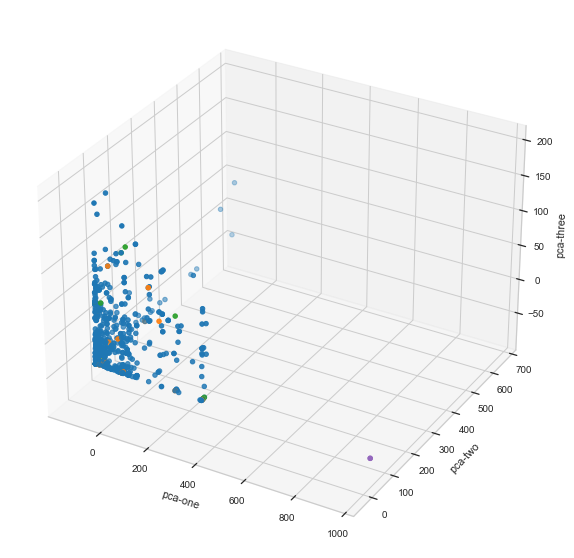

In [121]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df2.loc[:]["pca-one"], 
    ys=df2.loc[:]["pca-two"], 
    zs=df2.loc[:]["pca-three"], 
    c=df2.loc[:]["Installs (+n)"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### 6- Feature Reduction:
## -3- perform dimentionality reduction to reduce number of features:

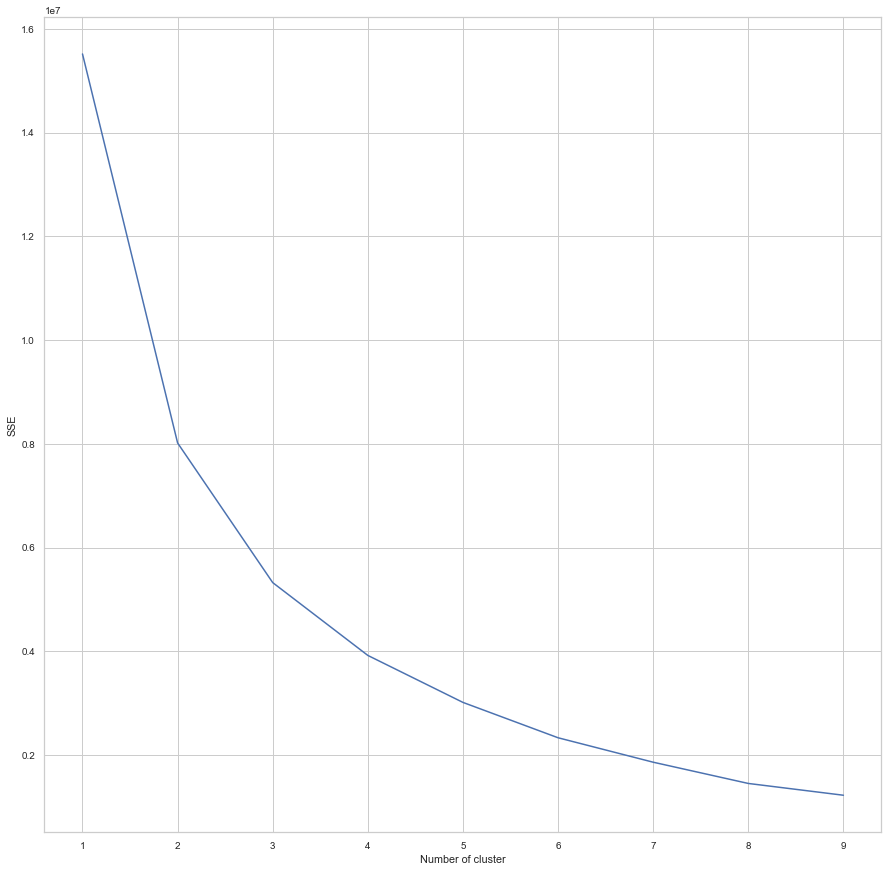

In [80]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x)
    x["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test) 
print(pca.explained_variance_ratio_)
print(len(x_train))

[0.47928538 0.35322683]
641


In [61]:
pca.singular_values_

array([1046.76584073,  898.62665183])

# Step 5: Model Training: 57 row X 10 features + Y

## -1- predicting the number of installs for a given unknown application
### a) Logistic Regression:

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_pred = linReg.predict(x_test)

print(f'Training Score: {linReg.score(x_train, y_train)} \n')
print(f'Test Score: {linReg.score(x_test, y_test)} \n')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}\n')

print(f'coefficients: {linReg.coef_}\n')
print(f'b (interception): {linReg.intercept_}\n') #underfitting this MSE is very large !!!!!!!!!!

Training Score: 0.422543896609318 

Test Score: -0.17009729628751757 

Root Mean Square Error: 867937678.3909882

coefficients: [[ 6.96444692e+07  5.52685693e+06  2.96368786e+09 -1.40172690e+08
  -2.42761443e+06 -3.55419615e+05 -4.21435948e+07  9.67254289e+05
  -1.00858905e+08  1.96805877e+08 -3.21028582e+08 -6.89481413e+07
   1.44991969e+08 -5.84368003e+08  3.93354172e+07  7.50830694e+08
   2.34037090e+08  3.91656320e+08 -4.63880082e+08 -1.06984809e+09
  -9.29217796e+07 -1.16892784e+08 -3.33786011e-06 -1.04324380e+08
  -9.29217796e+07  7.07196686e+08  1.29649897e+08 -9.93008154e+08
  -2.81188264e+08 -1.04324380e+08 -2.97526703e+08 -3.27004790e+08
   4.22435983e+08  1.29649897e+08  1.00274036e+08 -3.88715653e+08
   1.26283858e+09 -1.48262630e+08  6.14371619e+08 -9.29217796e+07
  -1.48262630e+08  3.04274811e+08  2.05011256e+08 -4.45987975e+08
   4.66810597e+07 -1.51035766e+08  1.12496857e+09 -5.22791687e+08
   5.35929767e+07  3.73732125e+08  1.22567113e+08 -2.65439087e+08
  -2.22362057e

### 2- Gradient Descent: Polynomial Regression:

In [131]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

linReg.fit(x_train_poly, y_train)
y_pred = linReg.predict(x_test_poly)

print(f'Training Score: {linReg.score(x_train_poly, y_train)}\n')
print(f'Test Score: {linReg.score(x_test_poly, y_test)}\n')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}\n')
# overfitting

Training Score: 1.0

Test Score: -6538.250199887625

Root Mean Square Error: 64884585016.86471



### 3- Gradient Descent: SVM - Linear:

In [64]:
from sklearn.svm import SVR

svm = SVR(kernel='linear') # select linear kernel since the distribution of datapoints is linear
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  #underfitting

Training Score: -0.08837953326707493
Test Score: -0.0859328841055147
Root Mean Square Error: 840393858.3340847


D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Gradient Descent: SVM - Poly:

In [65]:
svm = SVR(kernel='poly', degree=7, gamma='scale') 
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  #underfitting

Training Score: -0.0426992862489457
Test Score: -0.08561773324902999
Root Mean Square Error: 840271903.2544322


D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [66]:
svm = SVR(kernel='rbf', gamma='scale') 
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}') # still underfitting

Training Score: -0.08839879137741047
Test Score: -0.08593111438557943
Root Mean Square Error: 840393173.5484998


D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Gradient Descent: SVM - sigmoid:

In [67]:
svm = SVR(kernel='sigmoid', gamma='scale') 
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  # underfitting

D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Score: -0.08839879161923192
Test Score: -0.0859311135103169
Root Mean Square Error: 840393173.2098205


### 5- Decision Tree:

In [132]:
from sklearn.tree import DecisionTreeRegressor

DecTree = DecisionTreeRegressor()
DecTree.fit(x_train, y_train)
y_pred = DecTree.predict(x_test)

print(f'Training Score: {DecTree.score(x_train, y_train)}')
print(f'Test Score: {DecTree.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  # this is over fitting   

Training Score: 1.0
Test Score: -1.0330681135074116
Root Mean Square Error: 1144072426.3927953


### 6- Random Forest Regressor:

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#X, Y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=7, random_state=0)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print(f'Training Score: {regr.score(x_train, y_train)}')
print(f'Test Score: {regr.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  # this is over fitting a little bit better  

D:\Anaconda3\envs\MLenv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training Score: 0.8290193204424389
Test Score: 0.2250838883963161
Root Mean Square Error: 706325522.6138867


### Try cross-validation to overcome overfitting:

In [139]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regr, x, y, cv=5)
print(scores.mean(), scores.std())

-0.02850530919911436 0.1907235080724741


### 7- Regularization: Ridge Regularization:

In [135]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.arange(1, 100, 5), scoring='r2', cv=10)
_ = ridge.fit(x, y)
ridge.alpha_

51

In [136]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=51) #96
_ = ridge.fit(x_train, y_train)
preds = ridge.predict(x_test)

print("Training score:", ridge.score(x_train, y_train))
print("Testing score:", ridge.score(x_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}') #under fitting

Training score: 0.2853021772668791
Testing score: 0.06559685245620672
Root Mean Square Error: 706325522.6138867


### 8- Regularization: Lasso Regularization:

In [137]:
from sklearn.linear_model import Lasso, LassoCV

lasso = LassoCV(alphas=np.arange(0.000000001, 1, 0.05), cv=10)
_ = lasso.fit(x, y)

print('Best alpha:', lasso.alpha_)

D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7777810773490172e+20, tolerance: 7.731245928979128e+16
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.352041037005671e+20, tolerance: 7.731245928979128e+16
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.506378687088486e+19, tolerance: 7.731245928979128e+16
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did n

D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.822301375232803e+19, tolerance: 9.471385466057624e+16
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.824530318626462e+19, tolerance: 9.471385466057624e+16
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8276486466734522e+19, tolerance: 9.471385466057624e+16
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did n

D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.447751092285378e+19, tolerance: 1.019442131814389e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.447735609601652e+19, tolerance: 1.019442131814389e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.44771222161179e+19, tolerance: 1.019442131814389e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not

D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.256713240132257e+20, tolerance: 1.1305916987620368e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1127929964339895e+20, tolerance: 1.1305916987620368e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0238766185235808e+20, tolerance: 1.1305916987620368e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective d

D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2118630184737905e+20, tolerance: 1.1512935492999302e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2118130144657552e+20, tolerance: 1.1512935492999302e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2117479767051144e+20, tolerance: 1.1512935492999302e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective 

D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.305692103810502e+19, tolerance: 1.1521344210313435e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.300740050838533e+19, tolerance: 1.1521344210313435e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.300755001552365e+19, tolerance: 1.1521344210313435e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did

D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6265706726234663e+20, tolerance: 1.1722277230649626e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6238213275949033e+20, tolerance: 1.1722277230649626e+17
  tol, rng, random, positive)
D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5572427921039747e+20, tolerance: 1.1722277230649626e+17
  tol, rng, random, positive)


Best alpha: 0.050000001


D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6120636150127867e+20, tolerance: 1.1850189542705312e+17
  positive)


In [138]:
lasso = Lasso(alpha=0.050000001)
lasso.fit(x_train, y_train)
preds = lasso.predict(x_test)

print("Training score:", lasso.score(x_train, y_train))
print("Testing score:", lasso.score(x_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')

Training score: 0.4225438234165442
Testing score: -0.17065596502114722
Root Mean Square Error: 706325522.6138867


D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.111545653166775e+20, tolerance: 1.0776993253889533e+17
  positive)
